# Introduction to Energy: Plant-Powered World

Coal and many other fossil fuels are essentially plant matter whose carbon content has been concentrated over millions of years of anaerobic heating and compression deep below the Earth's surface. The carbon in these fuels came predominantly from CO$_2$ in the air millions of years ago, which was then converted to sugars via photosynthesis powered by the Sun - in theory, a carbon-negative process. The crux of climate change, however, is that the burning of these fossil fuels has been occuring a rate that is dumping that CO$_2$ back into the atmosphere much faster than the Earth's natural carbon cycle can draw it back down.

What if instead we try to meet humanity's energy consumption needs using plant matter that was grown months or years ago, instead of millions of years ago? This is essentially the goal of biofuels. Let's explore here the slightly simplified thought experiment of what it would take to power the world on lawn grass (think the type of grass grown on Killian Court and around campus).

First, we need to define what even is *energy* and furthermore how it is that grass and other plant matter contain some. We know qualitatively from experience that eating plants gives us metabolic energy to go about our lives, but what actually is happening at the molecular level in our digestive tracks? The key is a chemical reaction called *oxidation*. Within plant matter, sugars comprised of long self-repeating chains of carbon and hydrogen (e.g. cellulose, (C$_6$H$_{10}$O$_5$)$_n$) store a form of chemical potential energy. By introducing O$_2$ and inputing a small amount of energy to break some of these bonds to form comparatively more stable H$_2$O and CO$_2$ molecules, the difference in this potential energy between the final and initial molecules is converted to thermal energy (i.e. heat). This process is exactly what we call an *oxidation* reaction. *Side note:* the process by which plants convert H$_2$O and CO$_2$ back into sugars and release O$_2$ via photosynthesis is called the complimentary *reduction* reaction.

Looking at the oxidation reaction (also often called *combustion*) through the lens of the First Law of Thermodynamics, let's say we have two States 1 and 2 before and after the combustion. At State 1, we have cellulose and oxygen, and in State 2, we have carbon dioxide and water. The chemical reaction that links the two states is as follows:

$$C_6H_{10}O_5 + 6\,O_2 \rightarrow 6\,CO_2 + 5\,H_2O$$

We can write the first law as follows:

$$\Delta U = U_2 - U_1 = Q - W$$

where

$$U_1 = U_{reactants}(T_1) = n_{C_6H_{10}O_5}\cdot u_{C_6H_{10}O_5}(T_1) + n_{O_2}\cdot U_{O_2}(T_1)$$

$$U_2 = U_{products}(T_2) = n_{CO_2}\cdot u_{CO_2}(T_2) + n_{H_2O}\cdot U_{H_2O}(T_2)$$




The first question we can then ask is how much heat is released in this reaction? To simplify things, we can assume this reaction is done at constant volume so no work is done by our control volume, and also at constant temperature, leaving us with:

$$Q = U_2 - U_1$$

In practice, $U$ for each species is modeled using empirical thermodynamics data. For our purposes in this exercise, we will look up tabulated values at the temperatures we are interested in.

Let's actually plug in some numbers now:

In [ ]:
# Constants
M_cellulose = 162.1406  # g/mol

# Internal Energies @ 298 K
u_cellulose = -9.61e+05 # J/mol (https://nvlpubs.nist.gov/nistpubs/jres/44/jresv44n4p387_A1b.pdf)
u_CO2 = -3.96e+05 # J/mol (https://cearun.grc.nasa.gov/ThermoBuild/)
u_O2 = -2.48e+03 # J/mol (https://cearun.grc.nasa.gov/ThermoBuild/)
u_H2O_g = -2.44e+05 # J/mol (https://cearun.grc.nasa.gov/ThermoBuild/)
u_H2O_l = -2.88e+05 # J/mol (https://cearun.grc.nasa.gov/ThermoBuild/)

# Apply First Law to compute heat release per unit mass
u_1 = u_cellulose + 6 * u_O2 # J/mol
u_2 = 5 * u_H2O_g + 6 * u_CO2 # J/mol
q = (u_2 - u_1) / M_cellulose  # J/g

# Print answer
print(f'q = {-q*1e-3:0.3g} MJ/kg')

q = 16.2 MJ/kg


Now what happens if we burn wet biomass? All of the water carried by the biomass will need to be vaporized as well, detracting from the net heat release. We can account for this difference directly in the statement of the internal energy of both states 1 and 2. We will define a value, $X_{cellulose}$, which estimates the mass fraction of cellolose in the total biomass. Thus:

In [ ]:
# Constants
M_water = 18.01528 # g/mol

X_cellulose = 0.8
M_grass = X_cellulose * M_cellulose + (1 - X_cellulose) * M_water

u_1_grass = u_cellulose + (1 - X_cellulose) / X_cellulose * u_H2O_l + 6 * u_O2 # J/mol
u_2_grass = (1 - X_cellulose) / X_cellulose * u_H2O_g + 5 * u_H2O_g + 6 * u_CO2 # J/mol
q_grass = (u_2_grass - u_1_grass) / M_cellulose  # J/g

# Print answer
print(f'q = {-q_grass*1e-3:0.3g} MJ/kg')

q = 16.1 MJ/kg


Now let's look at how much lawn grass is necessary to support humanity, taking this heating value and assuming all of this energy can be used directly:

In [ ]:
N_people = 7.8e9 # people on Earth as of 2021
E_world_per_year = 9e19 # J/year (https://www.iea.org/fuels-and-technologies/electricity)
E_world_per_day = E_world_per_year / 365 # J/day
E_person_per_day = E_world_per_day / N_people # J/day

m_grass_per_person_day = E_person_per_day / (-q_grass) / X_cellulose # g

print(f"{m_grass_per_person_day*1e-3:.3g} kg grass/day")

2.46 kg grass/day


In reality, we will not be able to convert all of this thermal energy to mechanical work for a variety of reasons we will discuss later. Here, we can define a First Law efficiency

$$\eta_I = \frac{W_{useful}}{Q_{fuel}}$$

Parameterizing $\eta_I$ for now, we can compute a more conservative esimate for the total mass of lawn grass needed:

In [ ]:
conversion_eff = 0.3
print(f"{m_grass_per_person_day*1e-3/conversion_eff:.3g} kg grass/day")

8.19 kg grass/day


We can also plot the lawn grass mass as a function of $\eta_I$:

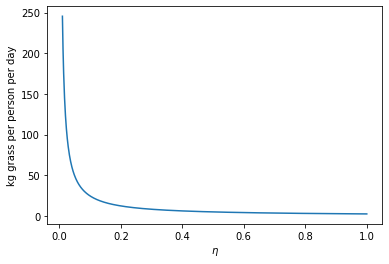

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

efficiency_range = np.linspace(0.01, 1, 1000)

plt.plot(efficiency_range, [m_grass_per_person_day*1e-3/e for e in efficiency_range])
plt.xlabel('$\eta$')
plt.ylabel('kg grass per person per day')
plt.show()

So as we can see here, assumptions made about efficiency have a significant impact on computed quantities related to energy consumption! We will learn shortly how to compute such an efficiency and what the limits are for the conversion of thermal energy to mechanical work.

Are biofuels truly renewable though? Let's compute the *carbon intensity* (kg CO$_2$/J) of this energy source. We see from the cellulose combustion reaction equation that we get 6 moles of CO$_2$ per mole of cellulose. Doing some unit conversion, we can use this information to compute the total mass of CO$_2$ emitted per Joule of energy we get from burning cellulose. We will again parameterize $\eta_I$:

In [ ]:
# Constants
M_CO2 = 44.01  # g/mol

# Parameters
conversion_eff = 0.3

# Compute carbon intensity
I_grass = 6 * X_cellulose * (M_CO2 / M_grass) / (-q_grass * 0.3) # g/J

print(f"I_cellulose = {I_grass*1e-3:0.3g} kg CO2/J")

I_cellulose = 3.28e-07 kg CO2/J


We can then use this value to compute total annual carbon emissions using this fuel:

In [ ]:
print(f"Burning lawn grass would emit {E_world_per_year*I_grass*1e-15:0.3g} Gt CO2 each year globally!")

Burning lawn grass would emit 29.5 Gt CO2 each year globally!


### Discussion Questions:

1.   Actual carbon intensity of energy consumption globally is around 8e-08 kg CO2/J (IEA). Why is this value lower than what we computed here?
2.   Total global annual carbon emissions are estimated to be around 35 Gt (IEA). Why is this different than what computed here?
3.   Is burning lawn grass for energy "renewable"? Compare this carbon intensity with that of coal under similar conditions (~3e-07 kg CO2/J).
4.   Are there other hidden costs, societal implications, and ethical considerations to be made with the use of biofuels?